# Explore here

PASO 0: IMPORTACIONES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest

PASO 1: LEER CSV IMPORTAR DATA

In [2]:
total_data= pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


PASO 2: EXPLORACIÓN Y LIMPIEZA DE DATOS

In [3]:
total_data.shape

(48895, 16)

* INFORMACIÓN DE LAS VARIABLES

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

La 1ª columna "#" indica el índex de las variables y la 2ª su nombre/indicador.

La 3ª columna cuenta las casillas que si tienen data dentro de todo el df, en el caso de las columnas 12 y 13 vemos que faltan unos 10.000 datos . La 4ª columna nos dice el tipo de dato que contienen las variables, numéricos o strings. 

Por último tenemos un recuento de las vada tipo de variable y cuánto ocupa en la memoria el total del df.

* DETECTAR DUPLICADOS

In [5]:
total_data.drop("id", axis = 1).duplicated().sum()


np.int64(0)

No se encuentran duplicados

* ELIMINAR INFO IRRELEVANTE

In [6]:
total_data.drop(["id","host_id","name", "host_name","latitude","longitude","last_review","reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


* CONCLUSIÓN

Columnas de data irrelevantes para el análisis porque:

Las siguientes variables string no aportan información relevante para la predicción del análisis porqué identifican al apartamento o los propietarios son: "id","host_id","name", "host_name"

Las columnas "latitude","longitude" son variables que no aportan información adicional ya que es la localización exacta del apartamento que se alquila y no nos hace falta esa información tan específica para el análisis de las reviews. Además seguimos teniendo información de la localización del apartamento con las columnas "neighbourhood_group" y "neighourhood"

Por último "last_review" y "reviews_per_month" aportan información que puede depender de varios factores, por ejemplo del simple hecho de que la persona tenga costumbre de poner una review o no, si el apartamento se haya alquilado ultimamente o no... Para analizar toda la información con estas variables nos faltarían datos y esto podría influir en los de resultados predictorios del problema y por ende del modelo de aprendizaje.


PASO 3: ANÁLISIS DE VARIBALES UNIVARIANTE

* ANÁLISIS UNIVARIANTE DE VAR. CATEGÓRICA

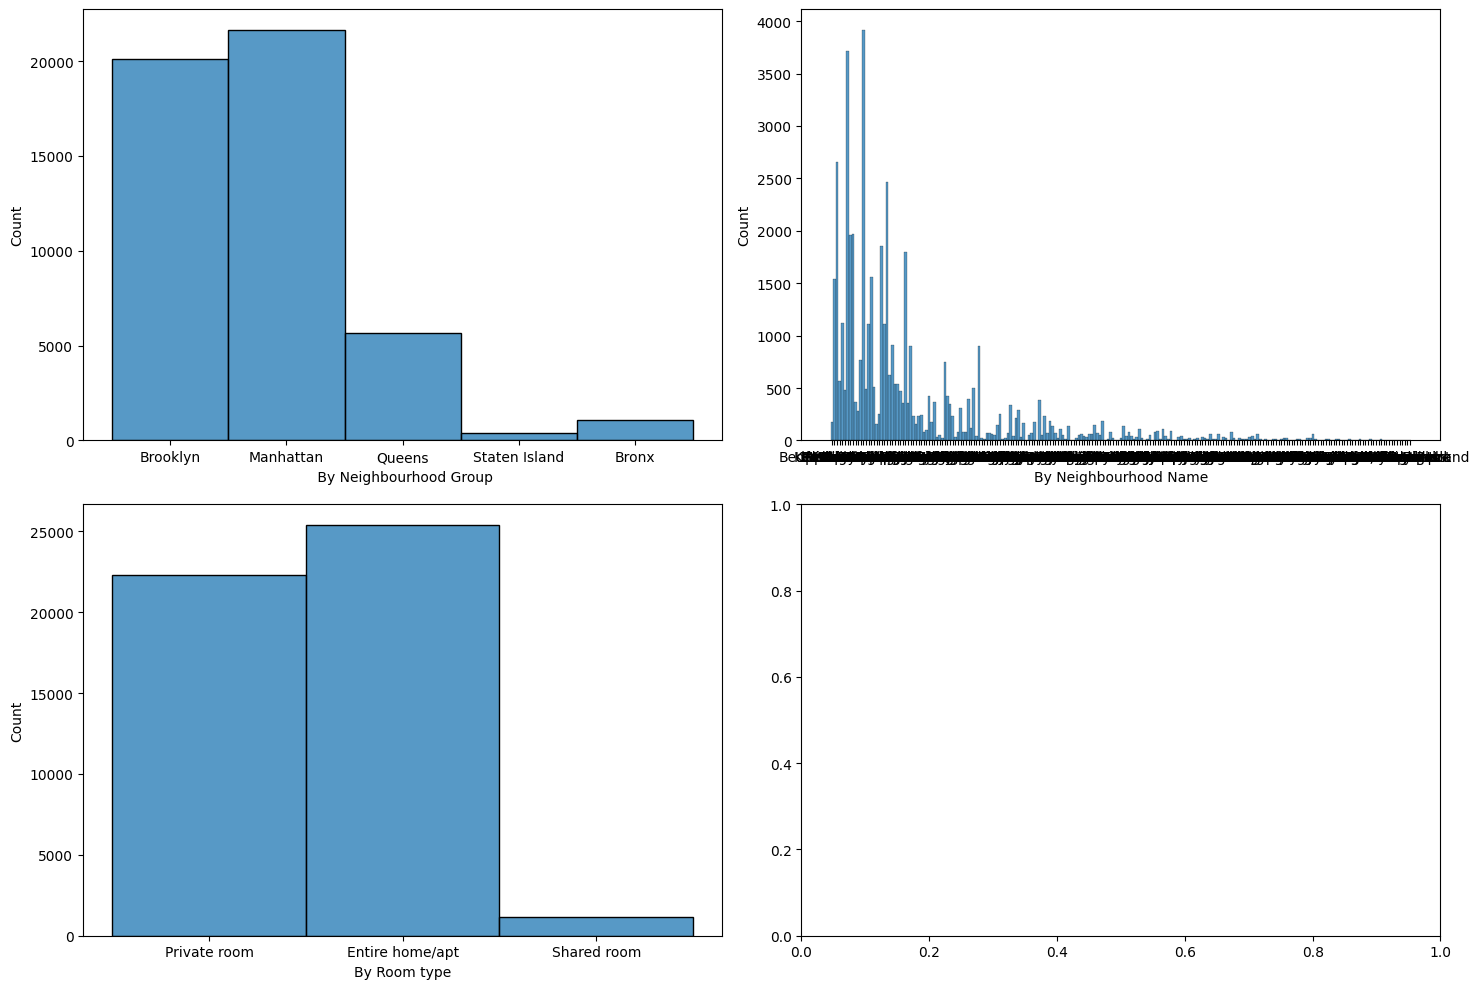

In [7]:


fig, axis = plt.subplots(2,2, figsize = (15, 10))

plot1= sns.histplot(ax = axis[0, 0], data = total_data, x = "neighbourhood_group").set(xlabel = " By Neighbourhood Group")
plot2 =sns.histplot(ax = axis[0, 1], data = total_data, x = "neighbourhood").set(xlabel = "By Neighbourhood Name")
plot3=sns.histplot(ax = axis[1, 0], data = total_data, x = "room_type").set(xlabel = "By Room type")

plt.tight_layout()


plt.show()


* CONCLUSIONES DEL ANÁLISIS VAR. UNIVARIABLES: 

Primera gráfica: El barrio dónde encontramos más apatamentos es Manhattan seguido de Brooklyn y en el que menos con diferencia es Staten Island

Segunda gráfica: Los datos son prácticamente imposible de analizar

Tercera gráfica: La mayoria de propiedades publicadas son casas completas y muy pocas de ellas son habitaciones compartidas

COMPROBANDO VALORES UNICOS DENTRO DE UNA COLUMNA "Neighbourhood"

In [8]:
total_data["neighbourhood"].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

* ANÁLISIS UNIVARIANTE DE VAR. NUMÉRICAS: 

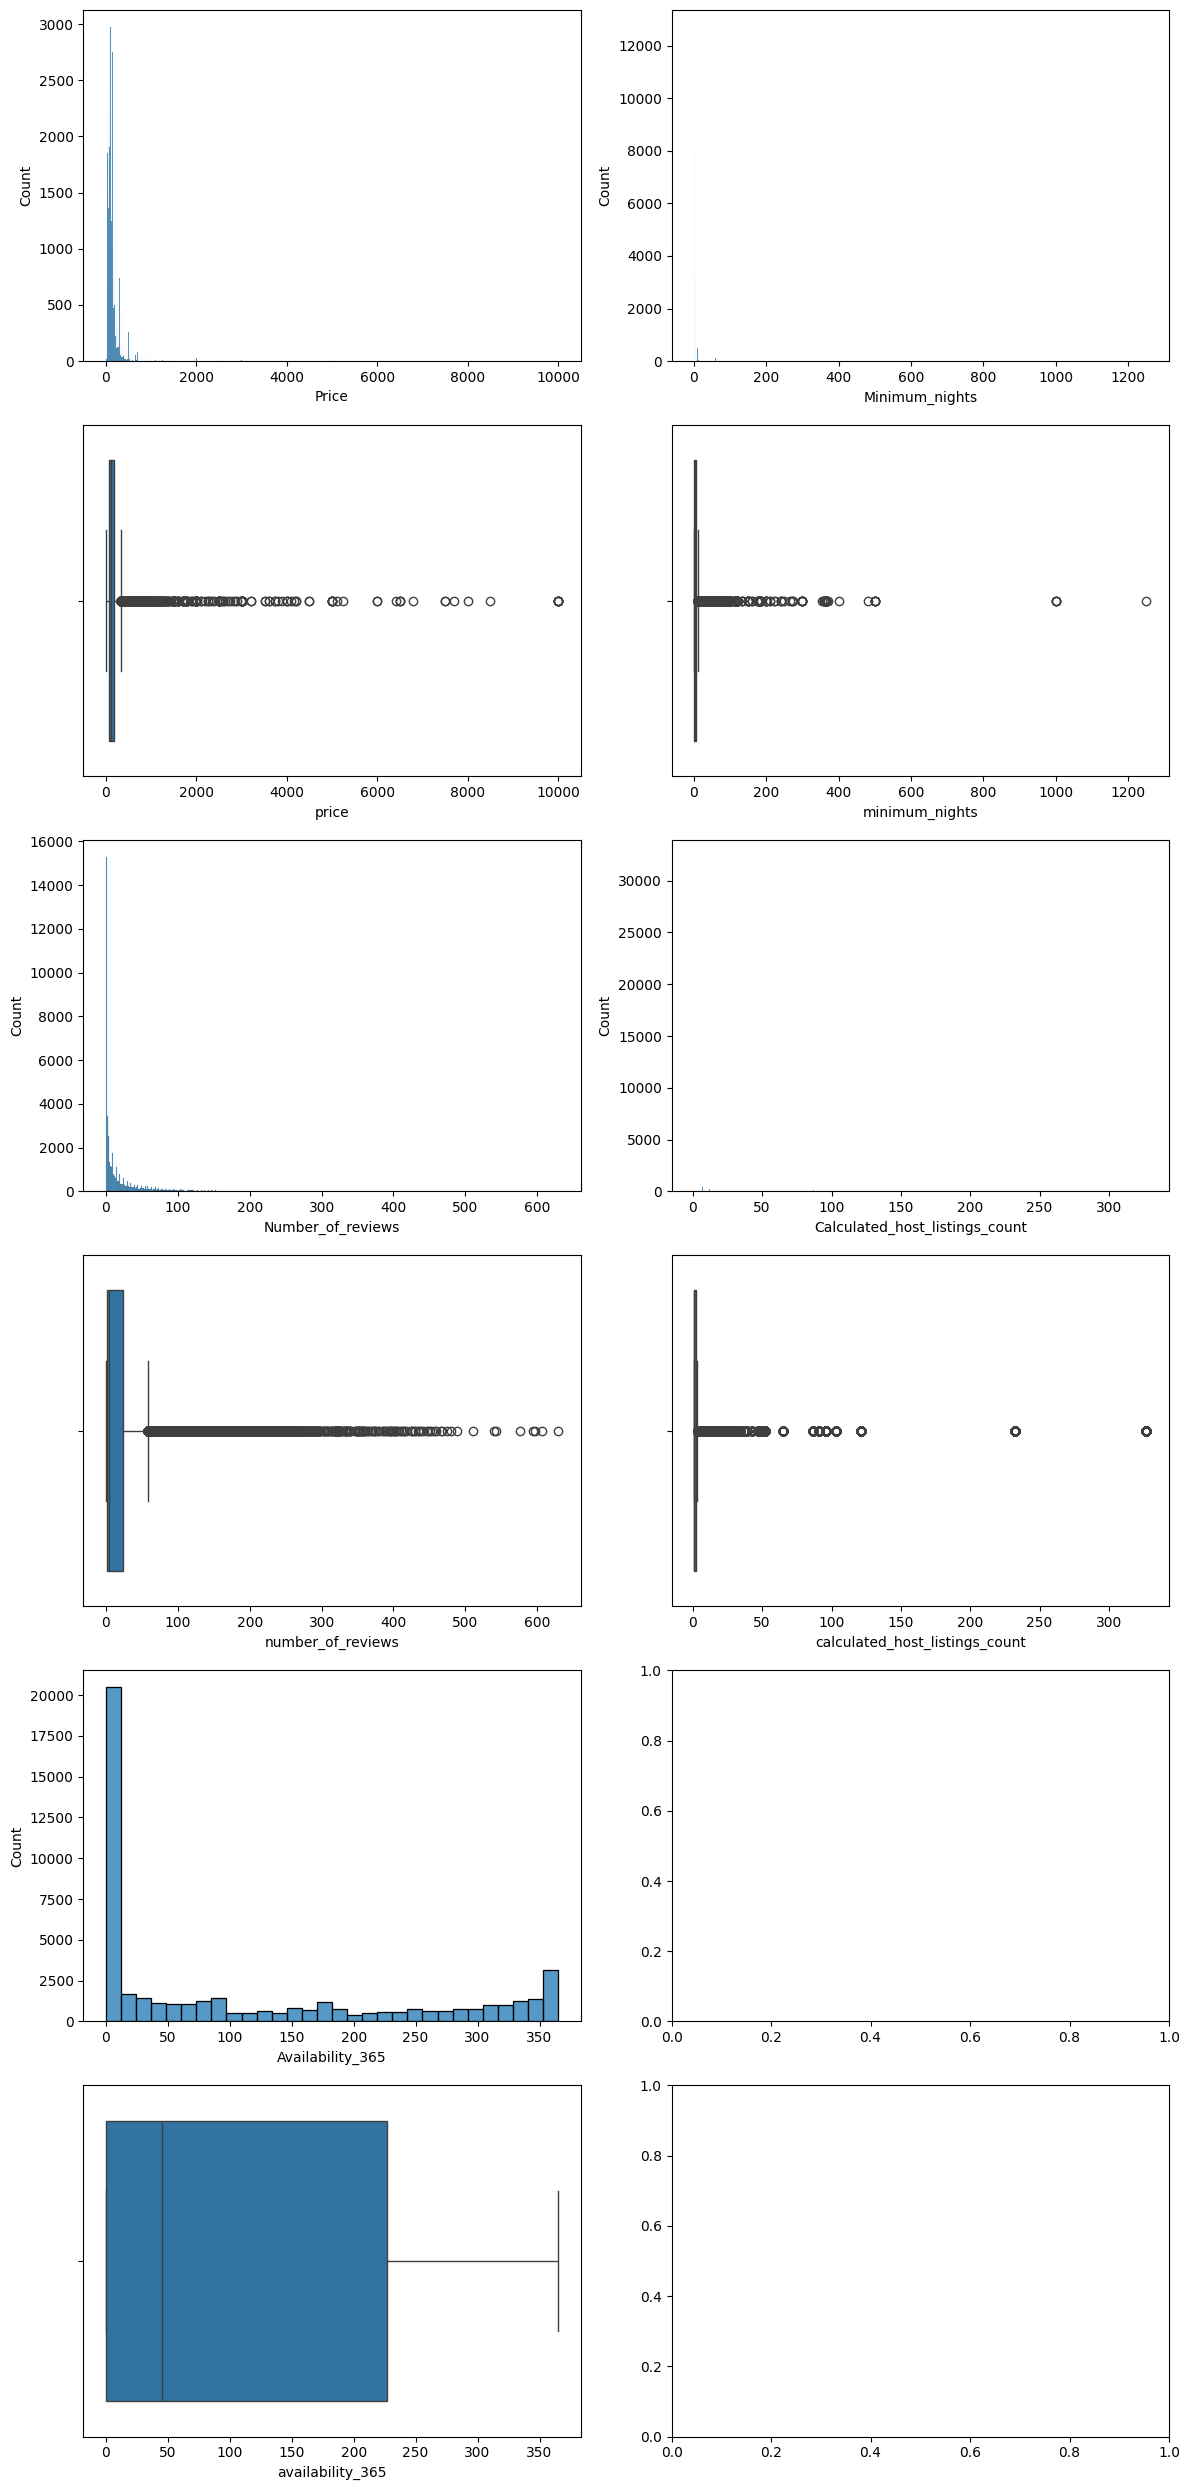

In [9]:
fig, axis = plt.subplots(6, 2, figsize = (12, 25))

sns.histplot(ax = axis[0, 0], data = total_data, x = "price").set(xlabel = "Price")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0,1], data = total_data, x = "minimum_nights").set(xlabel = "Minimum_nights")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews").set(xlabel = "Number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2, 1], data = total_data, x = "calculated_host_listings_count").set(xlabel = "Calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")

sns.histplot(ax = axis[4, 0], data = total_data, x = "availability_365").set(xlabel = "Availability_365")
sns.boxplot(ax = axis[5, 0], data = total_data, x = "availability_365")

plt.tight_layout()

plt.show()

* CONCLUSIONES DEL ANÁLISIS Vars. NUMÉRICAS(I): 

price, minimum_nights, number_of_reviews, calculated_host_lsiting, availability_365

Price, vemos que casi la mitad de la cantidad de apartamentos se concentran en el rango de precio de unos 100- 250$ por noche hasta unos 1000$ aunque también encontramos bastantes apartamentos con precios más altos.En el boxplot de price se refuerza la evidencia de los outliers, los demás apartamentos que tienen precios más elevados.

Minimum_nights, la mayoría de apartamentos tiene cómo mínimo de reserva una noche hasta 5 aproximadamente y en el boxplot encontramos una gran cantidad de valores atípicos 


Number_of_reviews, vemos que el gráfico tiene una disfribución sesgada hacía los valores bajos, dejando un rango intercuartil pequeño que indica que el mayor número de apartamentos tiene pocas reseñas aunque encontramos muchos outliers que igualmente indican que hay otros apartamentos con varias reseñas

Calculated_host_listings_count, en este caso la mayoría de valores están grupados cerca del 0 lo que indica que la mayoria de anfritriones tiene un apartamento en alquiler aunque de nuevo tenemos muchos valores en los outliers  agrupadaos hasta el valor 50, estos serían los anfitrionestienen más de un apartamento en alquiler

* VISUALIZACIÓN AMPLIADA DE HISTOGRAMAS Y BARPLOTS

<Axes: xlabel='minimum_nights'>

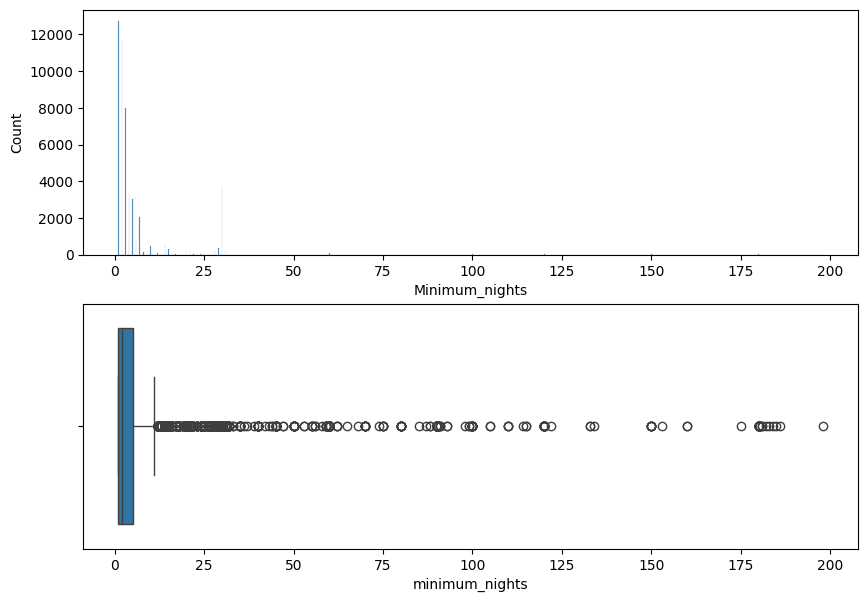

In [10]:
fig, axis = plt.subplots(2, 1, figsize = (10, 7))

sns.histplot(ax = axis[0], data = total_data[total_data["minimum_nights"]<200], x = "minimum_nights").set(xlabel = "Minimum_nights")
sns.boxplot(ax = axis[1], data = total_data[total_data["minimum_nights"]<200], x = "minimum_nights")


In [11]:

total_data.loc[(total_data["availability_365"]==0) | (total_data["availability_365"]>365)]

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
6,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,1,0
8,Manhattan,Upper West Side,Private room,79,2,118,1,0
14,Manhattan,West Village,Entire home/apt,120,90,27,1,0
20,Brooklyn,Williamsburg,Entire home/apt,299,3,9,1,0
...,...,...,...,...,...,...,...,...
48550,Queens,Ridgewood,Private room,45,1,0,1,0
48731,Brooklyn,Park Slope,Entire home/apt,111,8,0,1,0
48756,Manhattan,Murray Hill,Entire home/apt,129,2,0,1,0
48760,Queens,Sunnyside,Private room,46,1,0,1,0


* CONCLUSIÓN DEL ANÁLISIS VAR. NUMÉRICAS(II):

Availability_365, analizando la variable con un paso más encontramos datos que condicionan los resultados del gráfico y no aportarían negativamente tanto a la dispersión de los datos como a los resultados que nos indica ya que si los apartamentos no ofrecen 0 disponibilidad no hay posibilidad de que alguien lo alquilar y pueda aportar una review. Además es una cantidad considerable de apartamentos (17533)

PASO 4: ANÁLISIS DE VARIABLES MULTIVARIANTE

* ANÁLISIS NUMÉRICO - NUMÉRICO

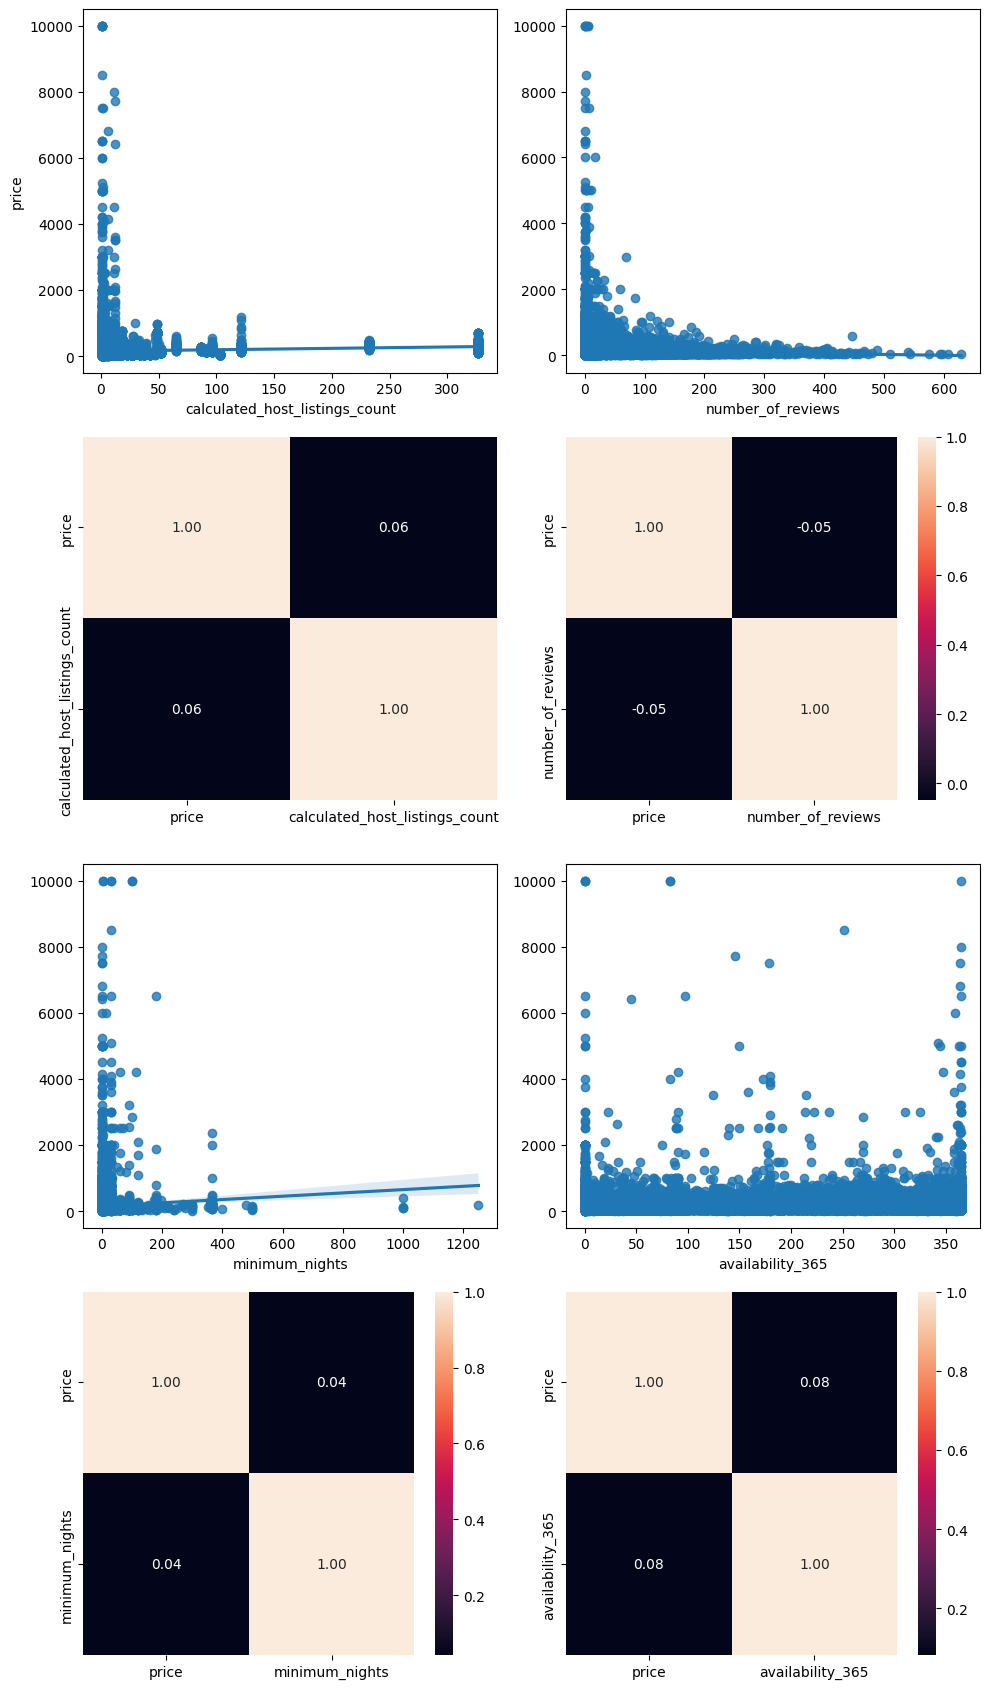

In [12]:
fig, axis = plt.subplots(4, 2, figsize = (10, 17))


sns.regplot(ax = axis[0, 0], data = total_data, x = "calculated_host_listings_count", y = "price")
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "minimum_nights", y = "price").set(ylabel=None)
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = total_data, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(total_data[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])


plt.tight_layout()

plt.show()



* CONCLUSIONES DEL ANÁLISLIS NUMÉRICO - NUMÉRICO

En los graficos de dispersión vemos que en prácticamente todos hay una tendencia de concentración de datos con tendencia a la baja con poca relación entre ellas. Se destaca la linea de regresión del gráfico de minimum_nights con la inclinación más positiva viendo que a mayor precio por apartamento la tendencia es que hayan más reseñas y en el caso de la disponibilidad es dónde se encuentra la mayor dispersión de datos por todo el gráfico ya que la mayoria de apartamentos están disponibles todo el año por un precio de 1000$ aprox. y algunos con precios mucho más elevados disponibles menos días al año.

Las varibales no se relacionan ninguna entre sí, podemos comporbarlo también con la matriz de correlación con precio incluso llegando a obtener resultados negativos entre price y number of reviews. 

* ANÁLISIS CATEGÓRICO-CATEGÓRICO

<Axes: xlabel='room_type', ylabel='count'>

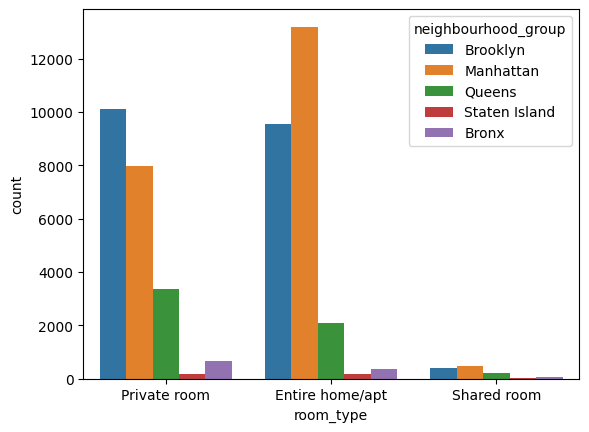

In [13]:
sns.countplot( data = total_data, x = "room_type", hue = "neighbourhood_group")


* CONCLUSIONES DEL ANÁLISIS CATEGÓRICO-CATEGÓRICO

En general los barrios dónde encontramos más alojamiento de diferentes tipos serán Manhattan y Brooklyn. Vemos que hay una diferencia significativa entre el numero de apartamentos enteros en Manhattan respecto a los demás barrios y aunque Brooklyn tiene el mayor numeor de habitaciones privadas. 

Por otra parte, algo más a destacar es que el tipo de estancia de menor presencia en la ciudad son las habitaciones compartidas

* ANÁLISIS DE CORRELACIONES CATEGÓRICO - NUMÉRICO

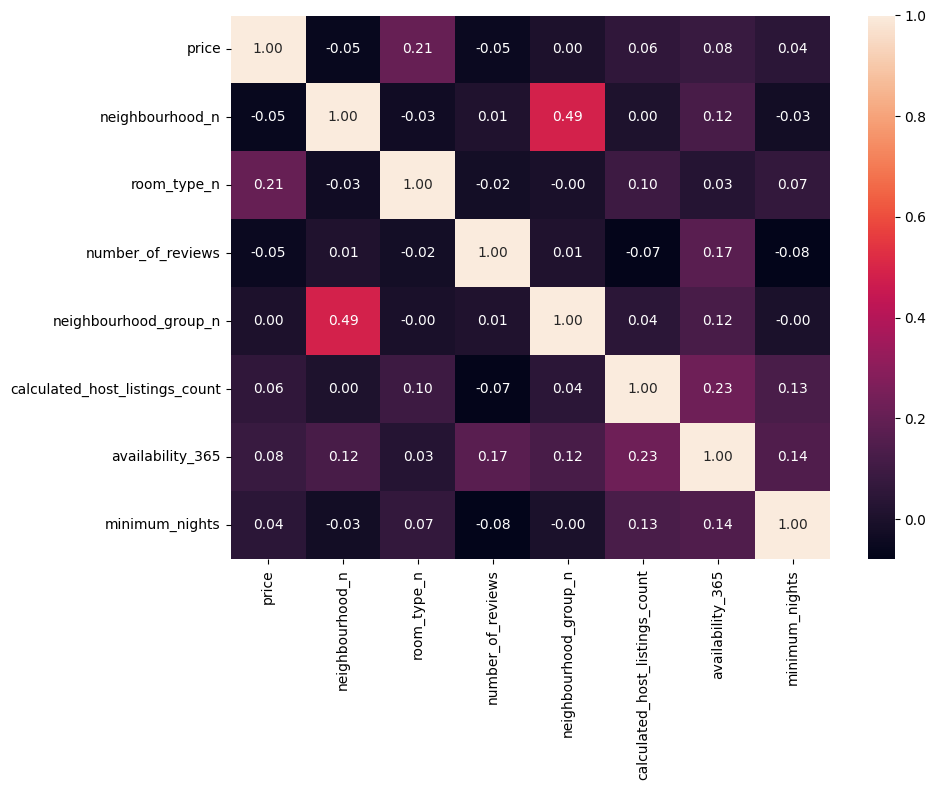

In [14]:

total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]

total_data["neighbourhood_group_n"] = pd.factorize(total_data["neighbourhood_group"])[0]

total_data["neighbourhood_n"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axis = plt.subplots(figsize = (10, 8))

sns.heatmap(total_data[["price","neighbourhood_n","room_type_n", "number_of_reviews", "neighbourhood_group_n", "calculated_host_listings_count", "availability_365","minimum_nights"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

* CONCLUSIONES

Los resultados no indican mucha relación entre las variables numéricas- categóricas. Las que mayor relación tienen son type_room con price, la disponibilidad con el número de apartamentos que dispone cada host y el grupo de barrio obviamente con los propios barrios. Estas varibles no estárían directamente relacionadas con las reviews, la que más se podría acercar es el type_room.

PASO 5: INGENIERÍA DE CARACTERÍSTICAS

* ANÁLISIS DESCRIPTIVO

In [15]:
total_data.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327,0.567113,0.786911,29.888782
std,240.154170,20.510550,44.550582,32.952519,131.622289,0.541249,0.844386,34.676634
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.500000
50%,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,1.000000,19.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000,37.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000,2.000000,4.000000,220.000000


* ANÁLISIS DE OUTLIERS

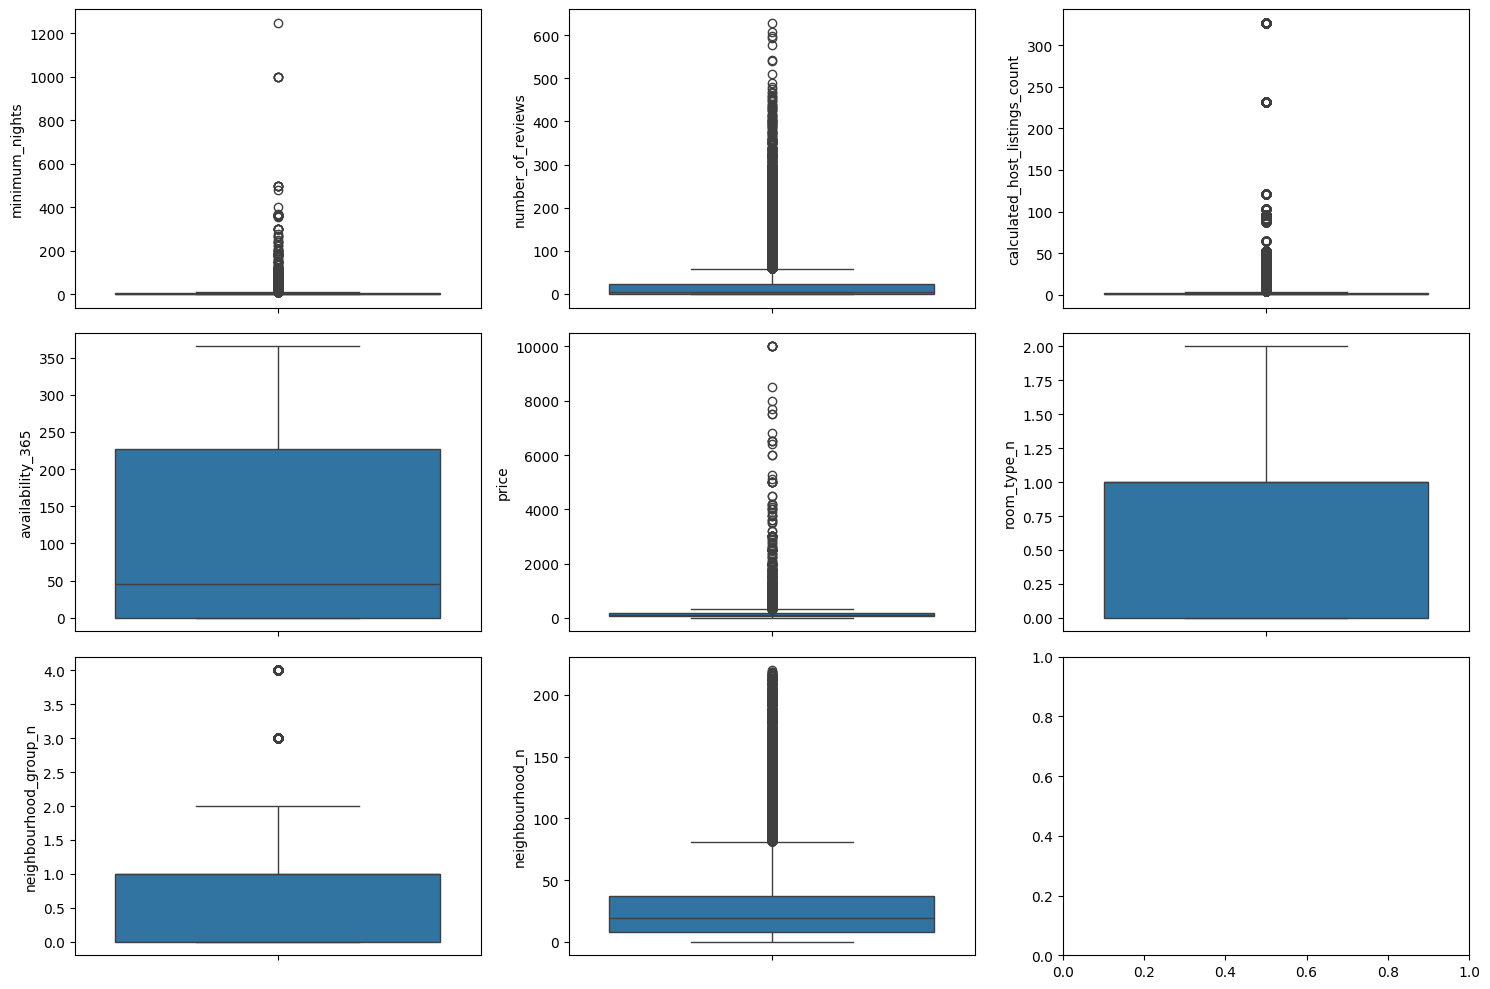

In [16]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "availability_365")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "price")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "room_type_n")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "neighbourhood_group_n")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "neighbourhood_n")

plt.tight_layout()

plt.show()

In [17]:
availability_stats = total_data["availability_365"].describe()
availability_stats

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

- Búsqueda de Outliers 

In [18]:
are_iqr = availability_stats["75%"] - availability_stats["25%"]
upper_limit = availability_stats["75%"] + 1.5 * are_iqr
lower_limit = availability_stats["25%"] - 1.5 * are_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(are_iqr, 2)}")

total_data[total_data["availability_365"] > 300]

Los límites superior e inferior para la búsqueda de outliers son 567.5 y -340.5, con un rango intercuartílico de 227.0


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
0,Brooklyn,Kensington,Private room,149,1,9,6,365,0,0,0
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355,1,1,1
2,Manhattan,Harlem,Private room,150,3,0,1,365,0,1,2
12,Brooklyn,South Slope,Private room,89,4,167,3,314,0,0,10
13,Manhattan,Upper West Side,Private room,85,2,113,1,333,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...
48880,Brooklyn,Williamsburg,Entire home/apt,120,1,0,3,365,1,0,12
48883,Manhattan,East Harlem,Private room,75,2,0,2,364,0,1,4
48884,Brooklyn,Williamsburg,Private room,190,7,0,1,341,0,0,12
48885,Manhattan,East Harlem,Private room,75,2,0,2,353,0,1,4


In [19]:
price_stats = total_data["price"].describe()

price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")



Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [20]:
total_data=total_data[total_data["price"] < 500 ]

CONCLUSIONES ELIMINACIÓN DE OUTLIERS
- Prueba availability,
- Eliminación precios >500,
-ANALIZAR TODAS LAS VARIABLES

ANÁLISIS DE VALORES FALTANTES

In [21]:
total_data.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_n                       0
neighbourhood_group_n             0
neighbourhood_n                   0
dtype: int64

No hay...por?¿

ESCALADO DE VALORES -- TODOS LOS DS SE DIVIDEN EN X_train, X_test, y_train, y_test 

-- KEY ERROR






In [22]:
num_variables = ["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "minimum_nights", "number_of_reviews", "calculated_host_listings_count","availability_365"]

# Dividimos el conjunto de datos en muestras de train y test
X = total_data.drop("price", axis = 1)[num_variables]
y = total_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
22411,0,6,1,2,12,1,9
47841,1,2,1,3,0,2,170
17106,1,7,1,4,7,1,3
13146,0,6,0,2,0,1,0
41169,2,49,0,1,5,2,358


NORMALIZACION Y ESCALADO MINIMO -- MISMO CODIGO
-- NAME ERROR

In [23]:
#NORM:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()
#nunca con la var objetivo

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
22411,-0.923507,-0.691436,0.814346,-0.245374,-0.257814,-0.186824,-0.779594
47841,0.252247,-0.806688,0.814346,-0.195595,-0.524214,-0.156449,0.450772
17106,0.252247,-0.662623,0.814346,-0.145815,-0.368814,-0.186824,-0.825446
13146,-0.923507,-0.691436,-1.027582,-0.245374,-0.524214,-0.186824,-0.848372
41169,1.428001,0.547525,-1.027582,-0.295153,-0.413214,-0.156449,1.887474


ESCALADO MÍNIMO -MÁXIMO

In [24]:
#ESC:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
22411,0.00,0.027273,0.5,0.000801,0.019078,0.000000,0.024658
47841,0.25,0.009091,0.5,0.001601,0.000000,0.003067,0.465753
17106,0.25,0.031818,0.5,0.002402,0.011129,0.000000,0.008219
13146,0.00,0.027273,0.0,0.000801,0.000000,0.000000,0.000000
41169,0.50,0.222727,0.0,0.000000,0.007949,0.003067,0.980822


SELECCION DE CARACTERÍSTICAS

In [25]:
# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

X_train_sel.head()

,neighbourhood_n,room_type_n,number_of_reviews,calculated_host_listings_count,availability_365
0,0.027273,0.5,0.019078,0.000000,0.024658
1,0.009091,0.5,0.000000,0.003067,0.465753
2,0.031818,0.5,0.011129,0.000000,0.008219
3,0.027273,0.0,0.000000,0.000000,0.000000
4,0.222727,0.0,0.007949,0.003067,0.980822


INFERENCIA VALORES - CHECK